Question 1/2 - Install libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import folium
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# import data
path = r'/Users/meghanmcgrath/Desktop'
data = pd.read_csv(os.path.join(path, 'Airbnb_NYC.csv'))
data.head(5)

,Unnamed: 0,airbnb_id,airbnb_name,host_id,host_name,borough,neighbourhood,latitude,longitude,room_type,price_per_night,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,10/19/18,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,5/21/19,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1,365
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,NaN,7/5/19,NaN,1,194
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,11/19/18,0.10,1,0


In [3]:
# Drop the extra index columns

data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

Question 3 - Clean data

In [5]:
data.shape

(48895, 16)

In [6]:
# Check for duplicates
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [7]:
# Check for missing values
data.isnull().sum()

airbnb_id                             0
airbnb_name                          16
host_id                               0
host_name                            21
borough                               0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price_per_night                    2964
minimum_nights                     6516
number_of_reviews                  5890
last_review                       10052
reviews_per_month                 13039
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
print(data['price_per_night'])

0        149.0
1        225.0
2        150.0
3         89.0
4         80.0
         ...  
48890     70.0
48891     40.0
48892    115.0
48893     55.0
48894     90.0
Name: price_per_night, Length: 48895, dtype: float64


In [14]:
# Delete records with missing values in the price per night column and number of reviews (missing values NOT 0s)

data.dropna(subset=['price_per_night'], inplace=True)
data.dropna(subset=['number_of_reviews'], inplace=True)

In [15]:
data.isnull().sum()

airbnb_id                             0
airbnb_name                          15
host_id                               0
host_name                            15
borough                               0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price_per_night                       0
minimum_nights                     5917
number_of_reviews                     0
last_review                        9014
reviews_per_month                 10458
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [18]:
# Drop unnecessary columns - no clarity on how this has been calculated as we are not given a timeline for reviews
data = data.drop(columns = ['reviews_per_month'])

In [19]:
data.shape

(40204, 15)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


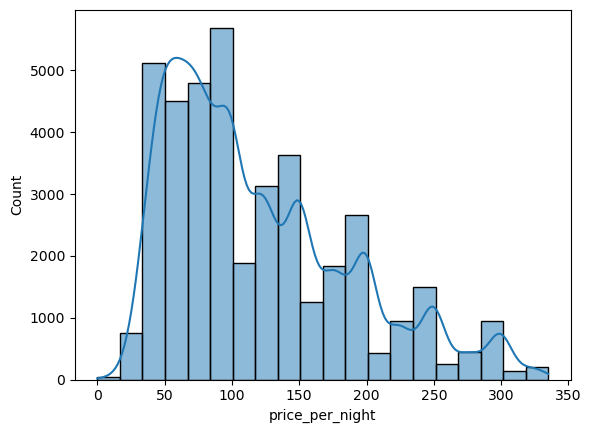

In [22]:
#Created a histogram for extreme values for price per night
hist_price = sns.histplot(data['price_per_night'], bins = 20, kde = True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


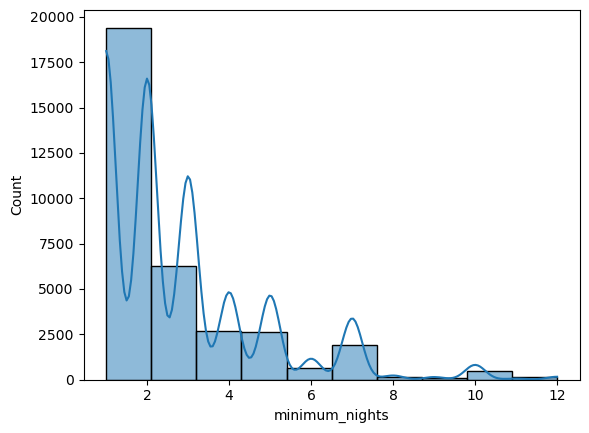

In [24]:
#Created a histogram for extreme values for minimum nights
hist_price = sns.histplot(data['minimum_nights'], bins = 10, kde = True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


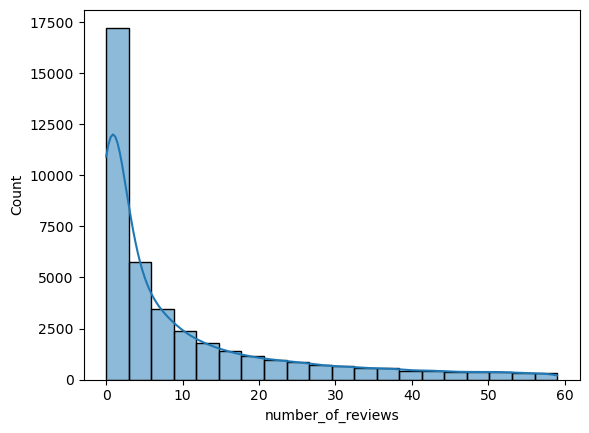

In [25]:
#Created a histogram for extreme values for number of reviews
hist_price = sns.histplot(data['number_of_reviews'], bins = 20, kde = True)

Question 4 - Scatterplots

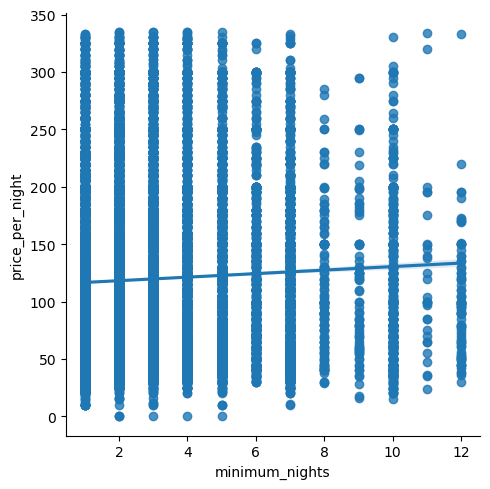

In [26]:
# Create scatterplot for price per night and minimum nights
scatter_min_nights = sns.lmplot(data=data, x='minimum_nights', y='price_per_night')

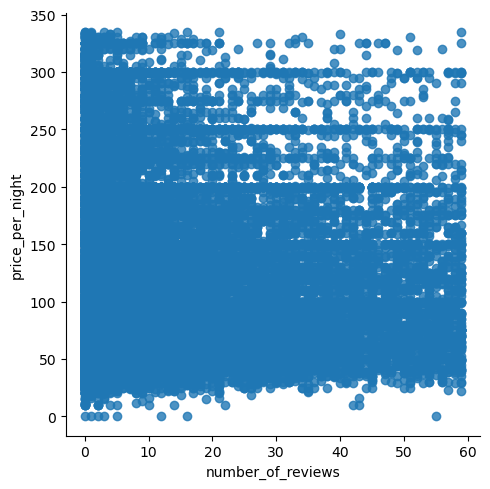

In [27]:
# Create scatterplot for price per night and number of reviews
scatter_num_reviews = sns.lmplot(data=data, x='number_of_reviews', y='price_per_night')

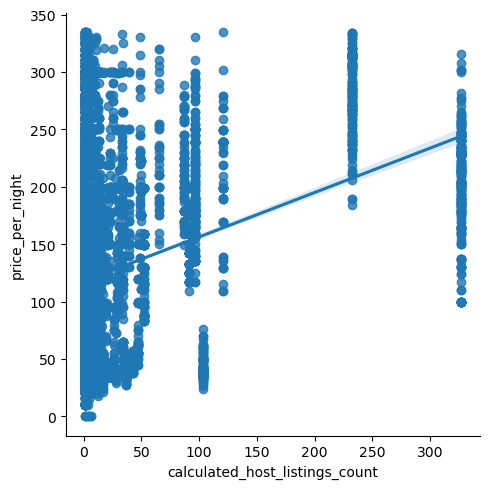

In [28]:
# Create scatterplot for price per night and number of listings
scatter_listings_count = sns.lmplot(data=data, x='calculated_host_listings_count', y='price_per_night')

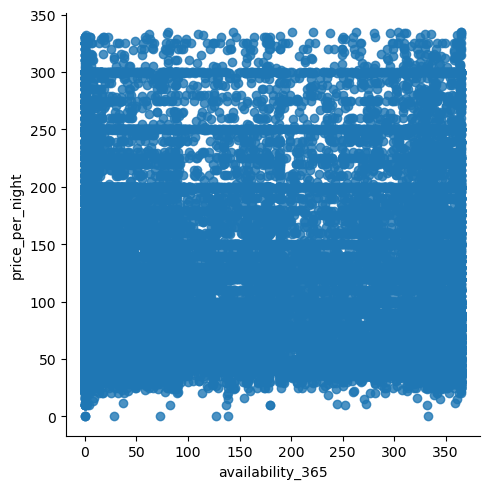

In [29]:
# Create scatterplot for price per night and availability
scatter_availability = sns.lmplot(data=data, x='availability_365', y='price_per_night')

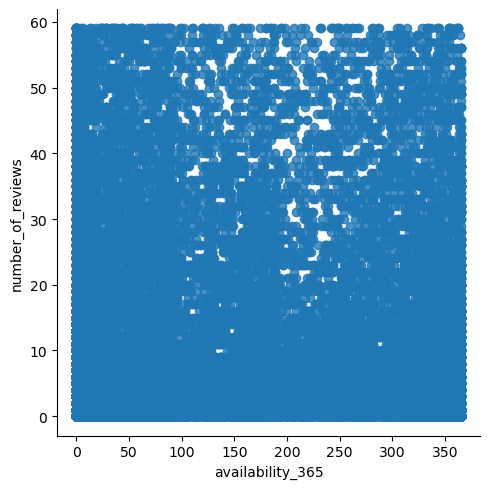

In [30]:
# Create scatterplot for number of reviews and availability
scatter_availability_reviews = sns.lmplot(data=data, x='availability_365', y='number_of_reviews')

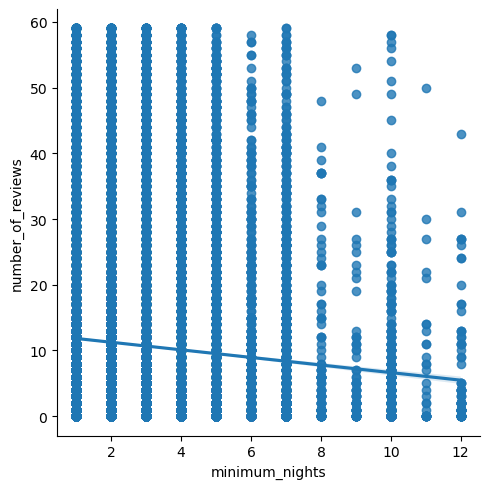

In [31]:
# Create scatterplot for number of reviews and minimum nights
scatter_min_nights_reviews = sns.lmplot(data=data, x='minimum_nights', y='number_of_reviews')

Question 5 - State hypothesis

My hypothesis is that there is no correlation between price per night and number of reviews.

Question 6 - Reshape the variables into NumPy arrays

In [33]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = data['number_of_reviews'].values.reshape(-1,1)
y = data['price_per_night'].values.reshape(-1,1)

Question 7 - Split the data into a training set and a test set

In [34]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Question 8/9/10 - Run a linear regression on the data

In [35]:
# Create a regression object

regression = LinearRegression()

In [36]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

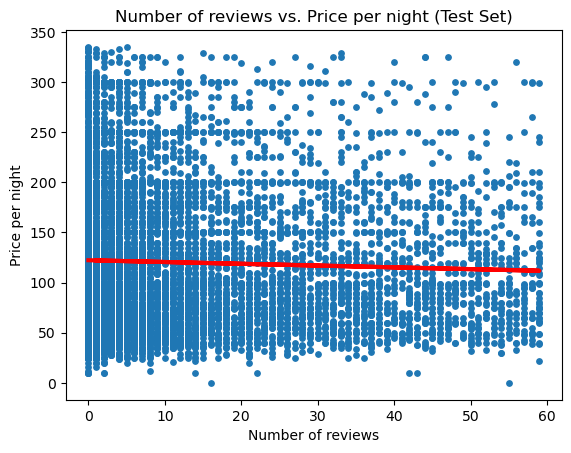

In [42]:
# Created a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, s = 15)
plot_test.plot(X_test, y_predicted,color='red', linewidth =3)
plot_test.title('Number of reviews vs. Price per night (Test Set)')
plot_test.xlabel('Number of reviews')
plot_test.ylabel('Price per night')
plot_test.show()

Line does not fit the data

Question 11 - Check model performance statistics

In [43]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [44]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.17737802]]
Mean squared error:  4680.402366824348
R2 score:  0.0008206066790648059


In [45]:
y_predicted

array([[122.14869449],
       [112.57028116],
       [117.53686585],
       ...,
       [118.601134  ],
       [122.14869449],
       [122.32607252]])

Question 12 - Compare the predicted y values with the actual values in the dataframe

In [46]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,125.0,122.148694
1,60.0,112.570281
2,114.0,117.536866
3,85.0,122.326073
4,99.0,113.811927
5,160.0,120.907048
6,250.0,121.793938
7,185.0,119.488024
8,35.0,121.793938
9,89.0,121.793938


In [47]:
# Compare how the regression fits the training set
y_predicted_train = regression.predict(X_train)

In [48]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.17737802]]
Mean squared error:  4763.920596110568
R2 score:  0.001230306867571862


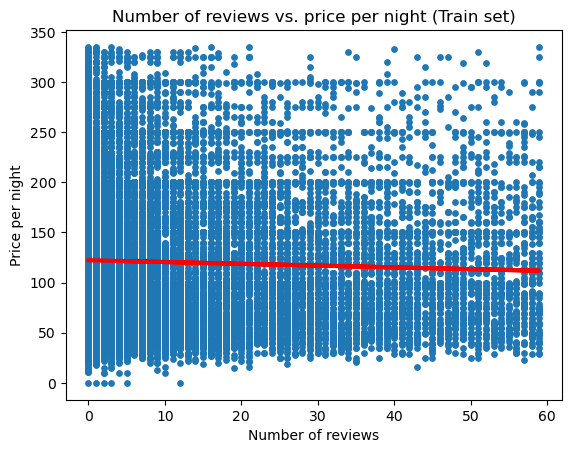

In [50]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number of reviews vs. price per night (Train set)')
plot_test.xlabel('Number of reviews')
plot_test.ylabel('Price per night')
plot_test.show()

Model did not perform well - when looking at the actual vs. predicted value, 